* Use Features to predict the medical costs
* Use features to predict a number -> Linear Regression Problem

In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt

2023-01-10 10:23:02.849839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import and read the insurance.csv data file
insurance = pd.read_csv('./insurance.csv')
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### `One hot encoding for object inputs: sex, smoker, region 3/6`

In [5]:
# using pandas get_dummies
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
# create X and y values [features and labels]
# X values are supposed to be the features, drop the charges column
X = insurance_onehot.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [7]:
# the y values are our prediction: charges
y = insurance_onehot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
# create a training and a test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
len(y_test), len(y_train), len(y)

(268, 1070, 1338)

In [43]:
# build a neural network that takes in X_train, y_train and learns the relationship

# 1. initialize a random seed
tf.random.set_seed(42)
# 2. create a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(10),
    ]
)

# 2. compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.047),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

# 3. Fit the model
model_plot = model.fit(X_train, y_train, epochs=200, verbose=0)

In [41]:
# to see the improvements we have done; re-instate the previous model

#set the seed
tf.random.set_seed(42)

# create a model
history = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# compile model
history.compile(
    optimizer = tf.optimizers.SGD(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

# fit the model
history = history.fit(X_train, y_train, epochs=200, verbose=0)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


In [40]:
# learn to evaluate on a light dataset - the test dataset
history.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5818.3320 - mae: 5818.3320


[5818.33203125, 5818.33203125]

Text(0.5, 0, 'epochs')

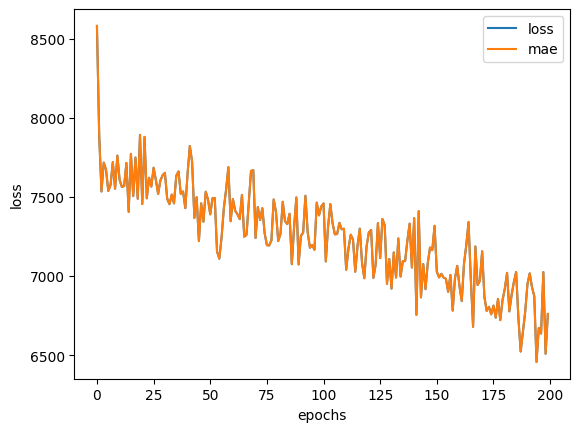

In [42]:
# see how it perfomes on a loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [46]:
# check model's perfomance on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.8606 - mae: 3167.8606


[3167.860595703125, 3167.860595703125]

Text(0, 0.5, 'epochs')

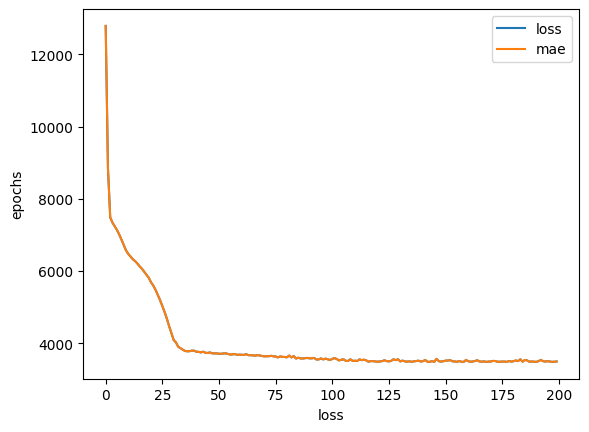

In [47]:
pd.DataFrame(model_plot.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

In [32]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [35]:
y_pred.shape, X_test.shape

((268, 10), (268, 11))

In [38]:
X_test_sq = tf.squeeze(X_test)
X_test_sq.shape

TensorShape([268, 11])

In [37]:
y_pred_exp = tf.expand_dims(y_pred, axis=-1)
y_pred_exp.shape

TensorShape([268, 10, 1])

In [ ]:
# mae = tf.metrics.mean_absolute_error(X_test, y_pred)